In [15]:
import pandas as pd

In [16]:
dataset_location = '/home/xp/trafficclassifier/dataset/'
ping_df = pd.read_csv(dataset_location+'ping_training_data.csv', delimiter='\t')
ping_df = ping_df.sample(n=25000, random_state=1)
voice_df = pd.read_csv(dataset_location+'voice_training_data.csv', delimiter='\t')
voice_df = voice_df.sample(n=25000, random_state=1)
dns_df = pd.read_csv(dataset_location+'dns_training_data.csv', delimiter='\t')
dns_df = dns_df.sample(n=25000, random_state=1)
telnet_df = pd.read_csv(dataset_location+'telnet_training_data.csv', delimiter='\t')
telnet_df = telnet_df.sample(n=25000, random_state=1)
df = pd.concat([ping_df, voice_df, dns_df, telnet_df], ignore_index=True)

In [17]:
types = df['Traffic Type'].isin(['ping', 'voice', 'dns', 'telnet'])

In [18]:
df.drop('Forward Packets', axis=1, inplace=True)
df.drop('Forward Bytes', axis=1, inplace=True)
df.drop('Reverse Packets', axis=1, inplace=True)
df.drop('Reverse Bytes', axis=1, inplace=True)

In [19]:
from sklearn.cluster import KMeans
import numpy as np
# k means
kmeans = KMeans(n_clusters=4, random_state=0)
df['cluster'] = kmeans.fit_predict(df[['Forward Average Bytes per second', 'Reverse Average Packets per second']])

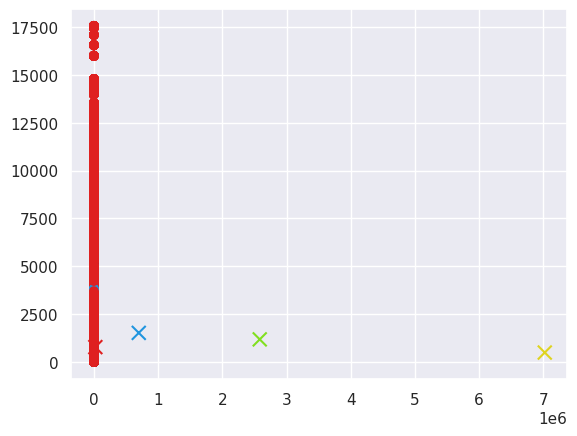

In [20]:
#get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids]
cen_y = [i[1] for i in centroids]
## add to df
df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2], 3:cen_x[3]})
df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2], 3:cen_y[3]})
# plot
import matplotlib.pyplot as plt

colors = ['#DF2020', '#81DF20', '#2095DF', '#DFD320']
df['color'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3]})

plt.scatter(df['Delta Forward Packets'], df['Delta Forward Bytes'], c=df['color'])
plt.scatter(cen_x, cen_y, marker='x', s=100, c=colors)
plt.show()

